In [ ]:
import numpy as np
import os  # OS library can be used for reading folders,sub-folders or files inside a directory.
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm  # Can be used as a progress tracker

In [ ]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

print (class_names_label)

number_of_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [ ]:
def load_data():
    
    datasets = ['../Data/seg_train/seg_train', '../Data/seg_test/seg_test']
    output = []
    
    #Iterating through Train & Test Data Set.
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading Started for ",dataset)
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):   # 6 times for each folder
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            # Example Path: ../Data/seg_train/seg_train/buildings
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [ ]:
(train_images, train_labels), (test_images, test_labels) = load_data()

In [ ]:
print (train_labels.shape)
print (test_labels.shape)
print (train_labels)

In [ ]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [ ]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [ ]:
index = np.random.randint(train_images.shape[0])
plt.figure()
plt.imshow(train_images[index])
plt.grid(False)
plt.title('Image #{} : '.format(index) + class_names[train_labels[index]])
plt.show()

In [23]:
model_scratch = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(84, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

model_scratch.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               5308544   
_________________________________________________________________
dense_6 (Dense)              (None, 84)               

In [24]:
model_scratch.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
history = model_scratch.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.15)

Train on 11928 samples, validate on 2106 samples
Epoch 1/20
11928/11928 [==============================] - 7s 562us/sample - loss: 1.2058 - accuracy: 0.5435 - val_loss: 0.9002 - val_accuracy: 0.6657
Epoch 2/20
11928/11928 [==============================] - 6s 533us/sample - loss: 0.8068 - accuracy: 0.6994 - val_loss: 0.8082 - val_accuracy: 0.6956
Epoch 3/20
11928/11928 [==============================] - 6s 533us/sample - loss: 0.6130 - accuracy: 0.7777 - val_loss: 0.7286 - val_accuracy: 0.7317
Epoch 4/20
11928/11928 [==============================] - 6s 539us/sample - loss: 0.4735 - accuracy: 0.8347 - val_loss: 0.6769 - val_accuracy: 0.7645
Epoch 5/20
11928/11928 [==============================] - 6s 539us/sample - loss: 0.3615 - accuracy: 0.8743 - val_loss: 0.7585 - val_accuracy: 0.7450
Epoch 6/20
11928/11928 [==============================] - 7s 556us/sample - loss: 0.2513 - accuracy: 0.9163 - val_loss: 0.7128 - val_accuracy: 0.7749
Epoch 7/20
11928/11928 [===========================

In [ ]:
for layer in model_scratch.layers:
    print (layer.get_weights())

In [20]:
test_loss = model_scratch.evaluate(test_images, test_labels)

3000/3000 [==============================] - 1s 358us/sample - loss: 1.2850 - accuracy: 0.7857


In [ ]:
image = cv2.imread("../Data/Evaluate/stre_1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, IMAGE_SIZE)
plt.imshow(image)

In [ ]:
evaluate_image = [image]
                
images = np.array(evaluate_image, dtype = 'float32')

In [ ]:
print (images.shape)

In [ ]:
model_scratch.predict(images)

In [ ]:
# {'mountain': 0, 'street': 1, 'glacier': 2, 'buildings': 3, 'sea': 4, 'forest': 5}
pred_labels = np.argmax(model_scratch.predict(images), axis = 1)
print(pred_labels)

In [ ]:
for class_name in class_names_label:
    if class_names_label[class_name] == pred_labels:
        print (class_name)

In [ ]:
predictions = model_scratch.predict(test_images)
pred_labels = np.argmax(predictions, axis = 1)

In [ ]:
CM = confusion_matrix(test_labels, pred_labels)
print (CM)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
plt.show()

In [ ]:
# {'mountain': 0, 'street': 1, 'glacier': 2, 'buildings': 3, 'sea': 4, 'forest': 5}
for idx,image in enumerate(test_images):
    if (pred_labels[idx] == 2) and (test_labels[idx] == 4):
        print (idx)
        plt.imshow(test_images[idx])
        print (test_labels)
        plt.show()
        input()
    

Transfer Learning

In [15]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

model_vgg = VGG16(weights='imagenet', include_top=False)
model_vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [16]:
train_learned_features = model_vgg.predict(train_images)
test_learned_features = model_vgg.predict(test_images)

In [18]:
number_train, h, w, d = train_learned_features.shape
number_test, h, w, d = test_learned_features.shape
length_of_features = h * w * d
print (h,w,d)

print(length_of_features)

4 4 512
8192


In [ ]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)

X = train_learned_features.reshape((number_train, h*w*d))
pca.fit(X)

pc_scores = pca.transform(X) 
pc1 = pc_scores[:,0]
pc2= pc_scores[:,1]

In [ ]:
plt.subplots(figsize=(20,20))

for idx, class_name in enumerate(class_names):
    plt.scatter(pc1[train_labels == idx][:1000], pc2[train_labels == idx][:1000], label = class_name, alpha=0.4)
plt.legend()
plt.title("PCA Projection")
plt.show()

In [19]:
model_vgg_weight = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (h, w, d)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [21]:
model_vgg_weight.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model_vgg_weight.fit(train_learned_features, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Train on 11227 samples, validate on 2807 samples
Epoch 1/20
11227/11227 [==============================] - 1s 65us/sample - loss: 0.5506 - accuracy: 0.7989 - val_loss: 0.3680 - val_accuracy: 0.8632
Epoch 2/20
11227/11227 [==============================] - 1s 45us/sample - loss: 0.3108 - accuracy: 0.8928 - val_loss: 0.3356 - val_accuracy: 0.8757
Epoch 3/20
11227/11227 [==============================] - 0s 43us/sample - loss: 0.2563 - accuracy: 0.9094 - val_loss: 0.3767 - val_accuracy: 0.8593
Epoch 4/20
11227/11227 [==============================] - 0s 44us/sample - loss: 0.2185 - accuracy: 0.9228 - val_loss: 0.3162 - val_accuracy: 0.8821
Epoch 5/20
11227/11227 [==============================] - 0s 44us/sample - loss: 0.1832 - accuracy: 0.9366 - val_loss: 0.3258 - val_accuracy: 0.8774
Epoch 6/20
11227/11227 [==============================] - 1s 45us/sample - loss: 0.1580 - accuracy: 0.9490 - val_loss: 0.3220 - val_accuracy: 0.8874
Epoch 7/20
11227/11227 [==============================] -

In [22]:
test_loss = model_vgg_weight.evaluate(test_learned_features, test_labels)

3000/3000 [==============================] - 0s 85us/sample - loss: 0.4753 - accuracy: 0.8757


[0]
mountain


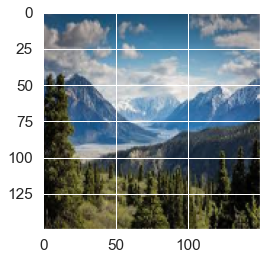

In [31]:
image = cv2.imread("../Data/Evaluate/moun_1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, IMAGE_SIZE)
plt.imshow(image)


evaluate_image = [image]
images = np.array(evaluate_image, dtype = 'float32')
eval_images_learned_features = model_vgg.predict(images)
model_vgg_weight.predict(eval_images_learned_features)

pred_labels = np.argmax(model_vgg_weight.predict(eval_images_learned_features), axis = 1)
print(pred_labels)
for class_name in class_names_label:
    if class_names_label[class_name] == pred_labels:
        print (class_name)

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3


pre_trained_model = InceptionV3(input_shape = (299, 299, 3), 
                                include_top = True,weights = "imagenet")

pre_trained_model.summary()